# Behavioral cloning

## Dataset

input csv database

In [1]:
from Database import loadCSV, loadCSV_beta, gen_X, gen_y, normImg, genData

db=loadCSV('data/udacity', 'driving_log.csv')


visualize distribution of steering angles

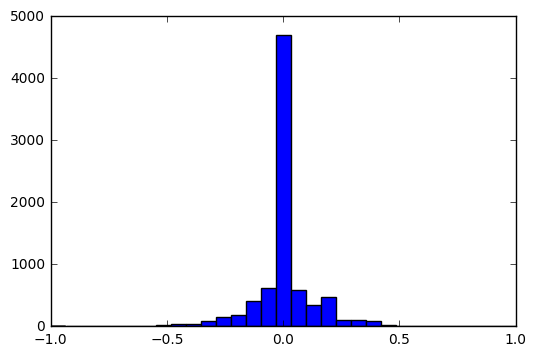

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

n, bins, patches=plt.hist([row['steering'] for row in db], bins=31, range=(-1,1))

Shuffle database

In [3]:
from sklearn.utils import shuffle
db = shuffle(db) 

load images for one sample

In [4]:
import matplotlib.image as mpimg

def loadSample(row):
    return {'left': mpimg.imread(row['left']), 
            'center': mpimg.imread(row['center']), 
            'right': mpimg.imread(row['right']),
            }
    

steering:  -0.05026283  throttle:  0.9855326


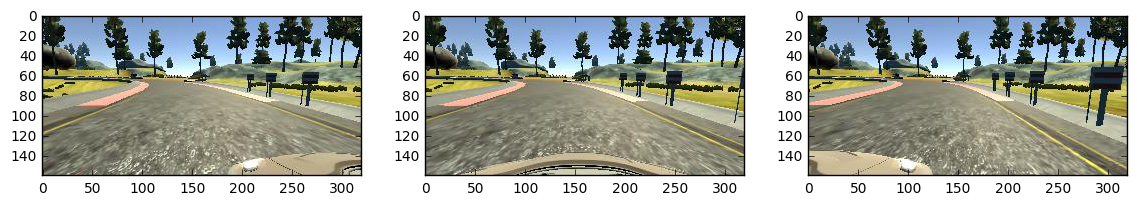

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

i_s=28
sample=loadSample(db[i_s])

plt.figure(figsize=(14,15))

plt.subplot(1, 3, 1)
plt.imshow(sample['left'])

plt.subplot(1, 3, 2)
plt.imshow(sample['center'])

plt.subplot(1, 3, 3)
plt.imshow(sample['right'])

print('steering: ', db[i_s]['steering'], ' throttle: ', db[i_s]['throttle'])


problem with simulator: only beta works on my machine. hence, only one camera (center) available. 
solution: imitating left and right camera by using sub images and rescaling.

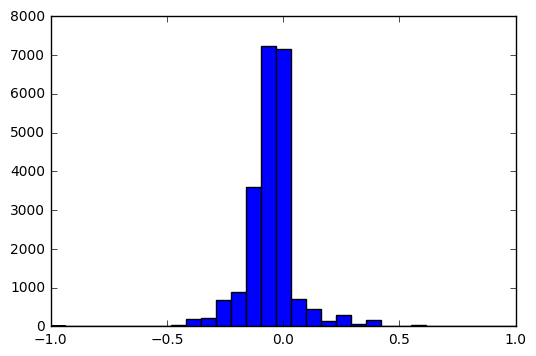

In [6]:
db_beta=loadCSV_beta('data/10', 'driving_log.csv')

n, bins, patches=plt.hist([row['steering'] for row in db_beta], bins=31, range=(-1,1))

steering:  0.0


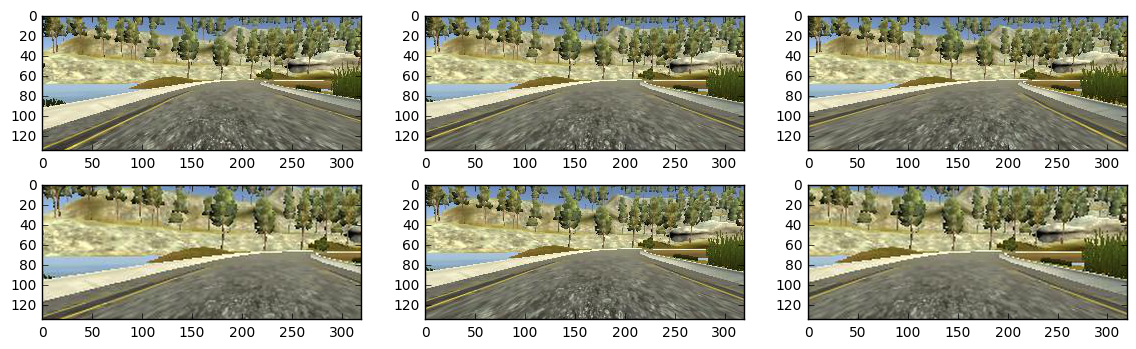

In [7]:
import numpy as np
import PIL
from PIL import Image
from Database import subImg

row=db[7000]
print('steering: ', row['steering'])
plt.figure(figsize=(14,4))
plt.subplot(2, 3, 2)
sample=mpimg.imread(row['center'])
plt.imshow(sample[0:135,:,:])
plt.subplot(2, 3, 1)
sample=mpimg.imread(row['left'])
plt.imshow(sample[0:135,:,:])
plt.subplot(2, 3, 3)
sample=mpimg.imread(row['right'])
plt.imshow(sample[0:135,:,:])

# vanishing point: y, x = 60, 120
sample=mpimg.imread(row['center'])
plt.subplot(2, 3, 4)
subsample=subImg(sample[0:135,:,:],0.8, (60,160),0.0)
plt.imshow(subsample)
plt.subplot(2, 3, 5)
subsample=subImg(sample[0:135,:,:],1.0, (60,160),0.5)
plt.imshow(subsample)
plt.subplot(2, 3, 6)
subsample=subImg(sample[0:135,:,:],0.8, (60,160),1.0)
plt.imshow(subsample)



## Data Augmentation
images above: first row: images from left/center/right camera; second row: all images from center camera, left/right images are rescaled parts of the center camera.
images below: flipping images and multiply steering angle with -1

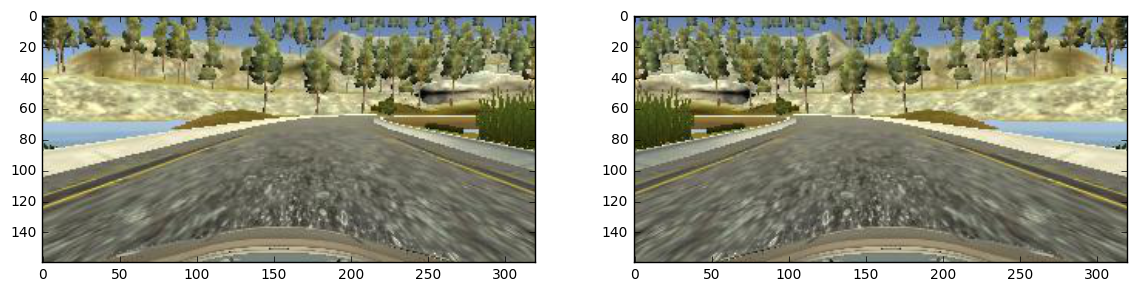

In [8]:
import cv2

plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
sample=mpimg.imread(row['center'])
plt.imshow(sample)
plt.subplot(1, 2, 2)
sample=mpimg.imread(row['center'])
plt.imshow(cv2.flip(sample,1))


## Network
Definition of the network can be found in network.py

Using TensorFlow backend.


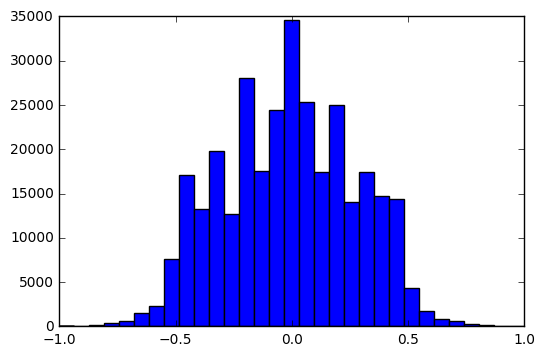

In [9]:
from network import createModel, createModel2, createModel3, createModel4, createModel5, createModel6
from Database import load_Xy, load_Xy_beta
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

X,y=load_Xy('data/udacity', 'driving_log.csv', delta=0.2, bias=0.00)
#X,y=load_Xy_beta('data/01', 'driving_log.csv', X, y, delta=0.0, bias=0.001)
#X,y=load_Xy_beta('data/02', 'driving_log.csv', X, y, delta=0.0, bias=0.0)
#X,y=load_Xy_beta('data/03_bw', 'driving_log.csv', X, y, delta=0.0, bias=0.0)
#X,y=load_Xy_beta('data/04', 'driving_log.csv', X, y, delta=0.1, bias=0.0)
#X,y=load_Xy_beta('data/05', 'driving_log.csv', X, y, delta=0.0, bias=0.0)
#X,y=load_Xy_beta('data/06', 'driving_log.csv', X, y, delta=0.0, bias=0.0)
#X,y=load_Xy_beta('data/07_bw', 'driving_log.csv', X, y, delta=0.1, bias=-0.0)
#X,y=load_Xy_beta('data/08', 'driving_log.csv', X, y, delta=0.1, bias=0.0)
#X,y=load_Xy_beta('data/09_waterLeft', 'driving_log.csv', X, y, delta=0.1, bias=0.0)
X,y=load_Xy_beta('data/10', 'driving_log.csv', X, y, delta=0.09, bias=0.0)
X,y=load_Xy_beta('data/11_bw', 'driving_log.csv', X, y, delta=0.09, bias=0.0)
#X,y=load_Xy_beta('data/alt_01', 'driving_log.csv', X, y, delta=0.0, bias=-0.0)

X,y=shuffle(X,y)

n, bins, patches=plt.hist(y, bins=31, range=(-1,1))

create training/validation data

In [10]:
numSamples=int(len(X)/1)
fracTrain=0.8
numTrain=int(numSamples*fracTrain+0.5)
numValid=int(numSamples*(1-fracTrain)+0.5)
XTrain=X[0:numTrain]
yTrain=y[0:numTrain]
XValid=X[numTrain:]
yValid=y[numTrain:]


In [11]:
model=createModel6(0.00025)  

history = model.fit_generator(genData(XTrain, yTrain, 80),
                              samples_per_epoch=int(numTrain/80)*80, nb_epoch=8, 
                              validation_data=genData(XValid, yValid, 80), nb_val_samples=numValid)


Epoch 1/5
253200/253200 [==============================] - 794s - loss: 0.0121 - acc: 0.0875 - mean_squared_error: 0.0121 - val_loss: 0.0199 - val_acc: 0.0375 - val_mean_squared_error: 0.0199

KeyboardInterrupt: 

In [ ]:
import numpy as np

for k in range(20):
    ml=model.predict(np.array([normImg(mpimg.imread(db[k]['left']))], np.float32), 1)/0.9
    mc=model.predict(np.array([normImg(mpimg.imread(db[k]['center']))], np.float32), 1)/0.9
    mr=model.predict(np.array([normImg(mpimg.imread(db[k]['right']))], np.float32), 1)/0.9
    print(k,db[k]['steering'], ml[0][0], mc[0][0], mr[0][0])
plt.imshow(mpimg.imread(db[k]['center']))
#i,db[i]['steering'], normImg(mpimg.imread(db[i]['center']))



In [ ]:
fileName='model26_nw6'

modelFile=fileName+'.json'

with open(modelFile, 'w') as jfile:
        modelString = model.to_json()
        jfile.write(modelString)
        
        jfile.close()
    
weightsFile=fileName+'.h5'
model.save_weights(weightsFile)
